<a href="https://colab.research.google.com/github/TORRENTIALBUG/MAT494HW/blob/main/1_3_MAT494.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.3.1 QR Decomposition

In [10]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)
def gram_schmidt(A):
    """Gram-schmidt Orthogonalization"""
    Q=np.zeros_like(A)
    cnt = 0
    for a in A.T:
        u = np.copy(a)
        for i in range(0, cnt):
            u -= np.dot(np.dot(Q[:, i].T, a), Q[:, i]) 
        e = u / np.linalg.norm(u)  # normalization 
        Q[:, cnt] = e
        cnt += 1
    R = np.dot(Q.T, A)
    return (Q, R)

np.set_printoptions(precision=4, suppress=True)
m = np.around(np.random.rand(5, 5)*100)  # random matrix m
print("m =", m, "\n")
(Q, R) = gram_schmidt(m) # QR decomposition by Gram-schmidt Orthogonalization
print("Q =", Q, "\nR =", R)
print("Q.R==m ?", (m-np.dot(Q, R)<0.0001).all())
print("R'.Q'==m' ?", (m.T-np.dot(R.T, Q.T)<0.0001).all())

import scipy.linalg
(Q2, R2) = scipy.linalg.qr(m)  # QR decomposition by scipy
print("Q2 =", Q, "\nR2 =", R)
print("Q.R==m ?", (m-np.dot(Q, R)<0.0001).all())
print("R'.Q'==m' ?", (m.T-np.dot(R.T, Q.T)<0.0001).all())

m = [[ 39.  97.  16.  78.  21.]
 [ 67.  63.  19.  88. 100.]
 [ 66.  91.  43.  86.  25.]
 [ 80.  94.  11.  39.  19.]
 [ 43.  68.  42.  18.  69.]] 

Q = [[ 0.2858  0.8364 -0.3446  0.2609  0.1788]
 [ 0.4911 -0.4571 -0.0291  0.5448  0.5022]
 [ 0.4837  0.0785  0.4528  0.2875 -0.6871]
 [ 0.5864 -0.2027 -0.5222 -0.5546 -0.1865]
 [ 0.3152  0.2104  0.6345 -0.4949  0.457 ]] 
R = [[136.4368 179.2332  54.3915 135.6526 100.0903]
 [  0.      54.7218  14.6787  27.641  -15.524 ]
 [  0.       0.      34.3089   0.5516  35.0291]
 [ -0.      -0.      -0.      62.4745  22.4616]
 [  0.       0.      -0.       0.      64.7872]]
Q.R==m ? True
R'.Q'==m' ? True
Q2 = [[ 0.2858  0.8364 -0.3446  0.2609  0.1788]
 [ 0.4911 -0.4571 -0.0291  0.5448  0.5022]
 [ 0.4837  0.0785  0.4528  0.2875 -0.6871]
 [ 0.5864 -0.2027 -0.5222 -0.5546 -0.1865]
 [ 0.3152  0.2104  0.6345 -0.4949  0.457 ]] 
R2 = [[136.4368 179.2332  54.3915 135.6526 100.0903]
 [  0.      54.7218  14.6787  27.641  -15.524 ]
 [  0.       0.      34.3089   0.

1.3.2 Least-squares Problems  
1.3.3 Linear Regression

X.shape: (15, 1)
Y.shape: (15, 1)
A.shape: (15, 2)
Coef: 0.99; Intercept: 2.82


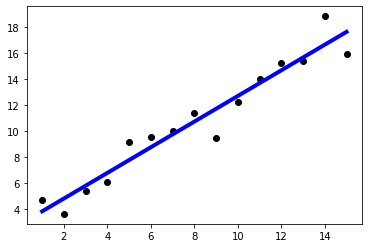

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# X is 1-15; Y is X+5*(a random number)
X = np.arange(1, 16).reshape((15, 1))
Y = X + 5 * np.random.random((15, 1))

# linear regression using numpy
A = np.hstack([X, np.ones((15, 1))])
print("X.shape:", X.shape)
print("Y.shape:", Y.shape)
print("A.shape:", A.shape)
c, i = np.linalg.lstsq(A, Y, rcond=None)[0]
plt.scatter(X, Y,  color='black')
plt.plot(X, X*c+i, color='blue', linewidth=4)
print("Coef: %.2f; Intercept: %.2f" % (c, i))
plt.show()

Score: 0.9337440906898614
Predict f(16) = 18.650201694512447
Mean squared error: 1.30
Coefficient of determination: 0.93
Coef: 0.99; Intercept: 2.82


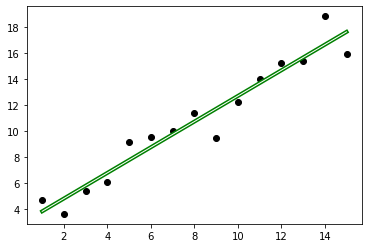

In [12]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# same data set
# linear regression using sklearn
reg = linear_model.LinearRegression().fit(X, Y)
pred_Y = reg.predict(X)
print("Score:", reg.score(X, Y))
print("Predict f(16) =", reg.predict(np.array([[16]]))[0][0])
print("Mean squared error: %.2f" % mean_squared_error(Y, pred_Y))
print("Coefficient of determination: %.2f" % r2_score(Y, pred_Y))
plt.scatter(X, Y,  color='black')
plt.plot(X, pred_Y, color='green', linewidth=4) # using predict function
pred_Y = X * reg.coef_[0][0] + reg.intercept_[0]
print("Coef: %.2f; Intercept: %.2f" % (reg.coef_[0][0], reg.intercept_[0]))
plt.plot(X, pred_Y, color='white', linewidth=1) # using expression
plt.show()